In [56]:
# 2️⃣ Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings("ignore")

pd.set_option("display.max_columns", None)
sns.set(style ="whitegrid")

In [55]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [3]:
# 3️⃣ Load Dataset from Kaggle Path

import os

# Check contents of the folder (useful if running first time)
# print(os.listdir("/kaggle/input/market-trend-and-external-factors-dataset"))

# Load CSV
df = pd.read_csv("hollywood_2025_hype_sentiment.csv")
df.head()

,Movie_Tag,Title,Source,Publish_Date,Director,Key_Cast,Genre,Studio,Link,Description_Snippet
0,Avatar_Fire_and_Ash,All hail Avatar! How event movies are trying t...,The Guardian,2025-12-09 16:17:00,James Cameron,"Sam Worthington, Zoe Saldaña, Sigourney Weaver...",Sci-Fi/Fantasy,20th Century Studios,https://news.google.com/rss/articles/CBMiyAFBV...,All hail Avatar! How event movies are trying t...
1,Avatar_Fire_and_Ash,"THE WEEKEND WARRIOR December 12, 2025 (Video E...",Substack,2025-12-09 14:31:35,James Cameron,"Sam Worthington, Zoe Saldaña, Sigourney Weaver...",Sci-Fi/Fantasy,20th Century Studios,https://news.google.com/rss/articles/CBMifkFVX...,"THE WEEKEND WARRIOR December 12, 2025 (Video E..."
2,Avatar_Fire_and_Ash,Avatar: Fire And Ash Is Among The Most Expensi...,SlashFilm,2025-12-09 18:20:00,James Cameron,"Sam Worthington, Zoe Saldaña, Sigourney Weaver...",Sci-Fi/Fantasy,20th Century Studios,https://news.google.com/rss/articles/CBMikgFBV...,Avatar: Fire And Ash Is Among The Most Expensi...
3,Avatar_Fire_and_Ash,6-Week Box Office Tracking & Forecasts: AVATAR...,Box Office Theory,2025-12-05 17:25:52,James Cameron,"Sam Worthington, Zoe Saldaña, Sigourney Weaver...",Sci-Fi/Fantasy,20th Century Studios,https://news.google.com/rss/articles/CBMijgJBV...,6-Week Box Office Tracking & Forecasts: AVATAR...
4,Avatar_Fire_and_Ash,Why ‘Avatar: Fire and Ash’ Received Box Office...,Us Weekly,2025-12-08 20:54:04,James Cameron,"Sam Worthington, Zoe Saldaña, Sigourney Weaver...",Sci-Fi/Fantasy,20th Century Studios,https://news.google.com/rss/articles/CBMixAFBV...,Why ‘Avatar: Fire and Ash’ Received Box Office...


In [45]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Publish_Date,500,2025-04-07 20:01:05.144000,2020-11-22 08:00:00,2025-01-12 02:00:00,2025-03-06 20:00:00,2025-11-17 08:00:00,2025-12-09 21:28:00,NaN
Year,500.0,2024.754,2020.0,2025.0,2025.0,2025.0,2025.0,0.598498
Month,500.0,6.724,1.0,2.75,6.0,12.0,12.0,4.620229
Day,500.0,13.844,1.0,6.0,11.0,23.25,31.0,9.45995


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Movie_Tag            500 non-null    object
 1   Title                500 non-null    object
 2   Source               500 non-null    object
 3   Publish_Date         500 non-null    object
 4   Director             500 non-null    object
 5   Key_Cast             500 non-null    object
 6   Genre                500 non-null    object
 7   Studio               500 non-null    object
 8   Link                 500 non-null    object
 9   Description_Snippet  500 non-null    object
dtypes: object(10)
memory usage: 39.2+ KB


In [9]:
df.isnull().sum()

Movie_Tag              0
Title                  0
Source                 0
Publish_Date           0
Director               0
Key_Cast               0
Genre                  0
Studio                 0
Link                   0
Description_Snippet    0
dtype: int64

## Data Cleaning 

In [11]:
# convert the published Date to Data and Time format

df["Publish_Date"] = pd.to_datetime(df["Publish_Date"], errors="coerce")

df["Publish_Date"].head()


0   2025-12-09 16:17:00
1   2025-12-09 14:31:35
2   2025-12-09 18:20:00
3   2025-12-05 17:25:52
4   2025-12-08 20:54:04
Name: Publish_Date, dtype: datetime64[ns]

In [12]:
df = df.drop_duplicates()
df.shape


(500, 10)

In [13]:
# to clean whit spaces in text columns

text_columns = ["Movie_Tag", "Title", "Source", "Director", "Key_Cast", 
                "Genre", "Studio", "Link", "Description_Snippet"]

for col in text_columns:
    df[col] = df[col].astype(str).str.strip()


In [15]:
# Extract Year, month, day from published date

df["Year"] = df["Publish_Date"].dt.year
df["Month"] = df["Publish_Date"].dt.month
df["Day"] = df["Publish_Date"].dt.day


In [16]:
df.head()

,Movie_Tag,Title,Source,Publish_Date,Director,Key_Cast,Genre,Studio,Link,Description_Snippet,Year,Month,Day
0,Avatar_Fire_and_Ash,All hail Avatar! How event movies are trying t...,The Guardian,2025-12-09 16:17:00,James Cameron,"Sam Worthington, Zoe Saldaña, Sigourney Weaver...",Sci-Fi/Fantasy,20th Century Studios,https://news.google.com/rss/articles/CBMiyAFBV...,All hail Avatar! How event movies are trying t...,2025,12,9
1,Avatar_Fire_and_Ash,"THE WEEKEND WARRIOR December 12, 2025 (Video E...",Substack,2025-12-09 14:31:35,James Cameron,"Sam Worthington, Zoe Saldaña, Sigourney Weaver...",Sci-Fi/Fantasy,20th Century Studios,https://news.google.com/rss/articles/CBMifkFVX...,"THE WEEKEND WARRIOR December 12, 2025 (Video E...",2025,12,9
2,Avatar_Fire_and_Ash,Avatar: Fire And Ash Is Among The Most Expensi...,SlashFilm,2025-12-09 18:20:00,James Cameron,"Sam Worthington, Zoe Saldaña, Sigourney Weaver...",Sci-Fi/Fantasy,20th Century Studios,https://news.google.com/rss/articles/CBMikgFBV...,Avatar: Fire And Ash Is Among The Most Expensi...,2025,12,9
3,Avatar_Fire_and_Ash,6-Week Box Office Tracking & Forecasts: AVATAR...,Box Office Theory,2025-12-05 17:25:52,James Cameron,"Sam Worthington, Zoe Saldaña, Sigourney Weaver...",Sci-Fi/Fantasy,20th Century Studios,https://news.google.com/rss/articles/CBMijgJBV...,6-Week Box Office Tracking & Forecasts: AVATAR...,2025,12,5
4,Avatar_Fire_and_Ash,Why ‘Avatar: Fire and Ash’ Received Box Office...,Us Weekly,2025-12-08 20:54:04,James Cameron,"Sam Worthington, Zoe Saldaña, Sigourney Weaver...",Sci-Fi/Fantasy,20th Century Studios,https://news.google.com/rss/articles/CBMixAFBV...,Why ‘Avatar: Fire and Ash’ Received Box Office...,2025,12,8


In [17]:
df["Valid_Link"] = df["Link"].str.startswith("http")
df.head()


,Movie_Tag,Title,Source,Publish_Date,Director,Key_Cast,Genre,Studio,Link,Description_Snippet,Year,Month,Day,Valid_Link
0,Avatar_Fire_and_Ash,All hail Avatar! How event movies are trying t...,The Guardian,2025-12-09 16:17:00,James Cameron,"Sam Worthington, Zoe Saldaña, Sigourney Weaver...",Sci-Fi/Fantasy,20th Century Studios,https://news.google.com/rss/articles/CBMiyAFBV...,All hail Avatar! How event movies are trying t...,2025,12,9,True
1,Avatar_Fire_and_Ash,"THE WEEKEND WARRIOR December 12, 2025 (Video E...",Substack,2025-12-09 14:31:35,James Cameron,"Sam Worthington, Zoe Saldaña, Sigourney Weaver...",Sci-Fi/Fantasy,20th Century Studios,https://news.google.com/rss/articles/CBMifkFVX...,"THE WEEKEND WARRIOR December 12, 2025 (Video E...",2025,12,9,True
2,Avatar_Fire_and_Ash,Avatar: Fire And Ash Is Among The Most Expensi...,SlashFilm,2025-12-09 18:20:00,James Cameron,"Sam Worthington, Zoe Saldaña, Sigourney Weaver...",Sci-Fi/Fantasy,20th Century Studios,https://news.google.com/rss/articles/CBMikgFBV...,Avatar: Fire And Ash Is Among The Most Expensi...,2025,12,9,True
3,Avatar_Fire_and_Ash,6-Week Box Office Tracking & Forecasts: AVATAR...,Box Office Theory,2025-12-05 17:25:52,James Cameron,"Sam Worthington, Zoe Saldaña, Sigourney Weaver...",Sci-Fi/Fantasy,20th Century Studios,https://news.google.com/rss/articles/CBMijgJBV...,6-Week Box Office Tracking & Forecasts: AVATAR...,2025,12,5,True
4,Avatar_Fire_and_Ash,Why ‘Avatar: Fire and Ash’ Received Box Office...,Us Weekly,2025-12-08 20:54:04,James Cameron,"Sam Worthington, Zoe Saldaña, Sigourney Weaver...",Sci-Fi/Fantasy,20th Century Studios,https://news.google.com/rss/articles/CBMixAFBV...,Why ‘Avatar: Fire and Ash’ Received Box Office...,2025,12,8,True


In [24]:
# spliting the ket cast into a List 

df["Key_Cast_List"] = df["Key_Cast"].str.split(",")
df["Key_Cast_List"].head()


0    [Sam Worthington,  Zoe Saldaña,  Sigourney Wea...
1    [Sam Worthington,  Zoe Saldaña,  Sigourney Wea...
2    [Sam Worthington,  Zoe Saldaña,  Sigourney Wea...
3    [Sam Worthington,  Zoe Saldaña,  Sigourney Wea...
4    [Sam Worthington,  Zoe Saldaña,  Sigourney Wea...
Name: Key_Cast_List, dtype: object

In [18]:
df["Movie_Tag"].value_counts()


Movie_Tag
Avatar_Fire_and_Ash    100
FNAF_2                 100
Sonic_3                100
Nosferatu              100
Mickey_17              100
Name: count, dtype: int64

In [20]:
df["Source"].value_counts()


Source
GamesRadar+            54
Screen Rant            41
Collider               29
Deadline               17
Cosmopolitan           14
                       ..
The Harvard Crimson     1
OSV News                1
KQED                    1
The Battalion           1
New York Post           1
Name: count, Length: 215, dtype: int64

In [21]:
df["Studio"].value_counts()


Studio
20th Century Studios    100
Blumhouse               100
Paramount               100
Focus Features          100
Warner Bros.            100
Name: count, dtype: int64

In [22]:
df["Genre"].value_counts()


Genre
Sci-Fi/Fantasy      100
Horror              100
Action/Adventure    100
Gothic Horror       100
Sci-Fi/Drama        100
Name: count, dtype: int64

In [23]:
df["Director"].value_counts()


Director
James Cameron    100
Emma Tammi       100
Jeff Fowler      100
Robert Eggers    100
Bong Joon-ho     100
Name: count, dtype: int64

In [25]:
df.head()

,Movie_Tag,Title,Source,Publish_Date,Director,Key_Cast,Genre,Studio,Link,Description_Snippet,Year,Month,Day,Valid_Link,Key_Cast_List
0,Avatar_Fire_and_Ash,All hail Avatar! How event movies are trying t...,The Guardian,2025-12-09 16:17:00,James Cameron,"Sam Worthington, Zoe Saldaña, Sigourney Weaver...",Sci-Fi/Fantasy,20th Century Studios,https://news.google.com/rss/articles/CBMiyAFBV...,All hail Avatar! How event movies are trying t...,2025,12,9,True,"[Sam Worthington, Zoe Saldaña, Sigourney Wea..."
1,Avatar_Fire_and_Ash,"THE WEEKEND WARRIOR December 12, 2025 (Video E...",Substack,2025-12-09 14:31:35,James Cameron,"Sam Worthington, Zoe Saldaña, Sigourney Weaver...",Sci-Fi/Fantasy,20th Century Studios,https://news.google.com/rss/articles/CBMifkFVX...,"THE WEEKEND WARRIOR December 12, 2025 (Video E...",2025,12,9,True,"[Sam Worthington, Zoe Saldaña, Sigourney Wea..."
2,Avatar_Fire_and_Ash,Avatar: Fire And Ash Is Among The Most Expensi...,SlashFilm,2025-12-09 18:20:00,James Cameron,"Sam Worthington, Zoe Saldaña, Sigourney Weaver...",Sci-Fi/Fantasy,20th Century Studios,https://news.google.com/rss/articles/CBMikgFBV...,Avatar: Fire And Ash Is Among The Most Expensi...,2025,12,9,True,"[Sam Worthington, Zoe Saldaña, Sigourney Wea..."
3,Avatar_Fire_and_Ash,6-Week Box Office Tracking & Forecasts: AVATAR...,Box Office Theory,2025-12-05 17:25:52,James Cameron,"Sam Worthington, Zoe Saldaña, Sigourney Weaver...",Sci-Fi/Fantasy,20th Century Studios,https://news.google.com/rss/articles/CBMijgJBV...,6-Week Box Office Tracking & Forecasts: AVATAR...,2025,12,5,True,"[Sam Worthington, Zoe Saldaña, Sigourney Wea..."
4,Avatar_Fire_and_Ash,Why ‘Avatar: Fire and Ash’ Received Box Office...,Us Weekly,2025-12-08 20:54:04,James Cameron,"Sam Worthington, Zoe Saldaña, Sigourney Weaver...",Sci-Fi/Fantasy,20th Century Studios,https://news.google.com/rss/articles/CBMixAFBV...,Why ‘Avatar: Fire and Ash’ Received Box Office...,2025,12,8,True,"[Sam Worthington, Zoe Saldaña, Sigourney Wea..."


In [29]:
# most frequent Cast Names

from collections import Counter

cast_list = df["Key_Cast"].dropna().str.split(",").sum()
cast_list = [name.strip() for name in cast_list]

Counter(cast_list).most_common(18)  # Top 10 cast


[('Sam Worthington', 100),
 ('Zoe Saldaña', 100),
 ('Sigourney Weaver', 100),
 ('Kate Winslet', 100),
 ('Josh Hutcherson', 100),
 ('Matthew Lillard', 100),
 ('Elizabeth Lail', 100),
 ('Piper Rubio', 100),
 ('Ben Schwartz', 100),
 ('Jim Carrey', 100),
 ('Keanu Reeves (Shadow)', 100),
 ('Idris Elba', 100),
 ('Bill Skarsgård', 100),
 ('Lily-Rose Depp', 100),
 ('Nicholas Hoult', 100),
 ('Robert Pattinson', 100),
 ('Steven Yeun', 100),
 ('Mark Ruffalo', 100)]

In [30]:
# Most common words in Titles

from collections import Counter
import re

title_text = " ".join(df["Title"].astype(str))
words = re.findall(r'\w+', title_text.lower())

Counter(words).most_common(15)   # top 15 words


[('the', 329),
 ('s', 184),
 ('and', 149),
 ('review', 146),
 ('a', 137),
 ('box', 113),
 ('office', 113),
 ('avatar', 102),
 ('sonic', 102),
 ('nosferatu', 100),
 ('mickey', 99),
 ('17', 99),
 ('movie', 97),
 ('of', 95),
 ('3', 92)]

In [31]:
df["Publish_Date"].value_counts().sort_index()


Publish_Date
2020-11-22 08:00:00    1
2021-05-28 07:00:00    1
2021-09-09 07:00:00    1
2022-08-04 07:00:00    1
2022-08-16 07:00:00    1
                      ..
2025-12-09 14:54:00    1
2025-12-09 16:17:00    1
2025-12-09 16:39:00    1
2025-12-09 18:20:00    1
2025-12-09 21:28:00    1
Name: count, Length: 277, dtype: int64

In [32]:
df.groupby(df["Publish_Date"].dt.to_period("M")).size()


Publish_Date
2020-11     1
2021-05     1
2021-09     1
2022-08     2
2023-01     1
2023-02     1
2023-03     2
2023-10     8
2023-11     3
2024-01     3
2024-03     1
2024-04     1
2024-06     1
2024-07     2
2024-08     1
2024-09     2
2024-10     3
2024-11     3
2024-12    57
2025-01    83
2025-02    37
2025-03    97
2025-04    17
2025-05     5
2025-06     4
2025-07     8
2025-08     2
2025-09     3
2025-10     7
2025-11    54
2025-12    89
Freq: M, dtype: int64

In [33]:
df.groupby(["Source", df["Publish_Date"].dt.date]).size()


Source                 Publish_Date
- IONCINEMA.com        2024-12-24      1
828 News Now           2024-12-27      1
ABC News               2025-03-07      1
AOL.com                2025-04-09      1
                       2025-04-28      1
                                      ..
vocal.media            2025-12-02      1
websterjournal.com     2025-04-03      1
whatsondisneyplus.com  2025-12-01      1
winteriscoming.net     2025-12-02      1
株式会社セガ                 2025-01-22      1
Length: 483, dtype: int64

In [34]:
# Which Source Mentions movie the Most

df.groupby("Source")["Movie_Tag"].count().sort_values(ascending=False)


Source
GamesRadar+              54
Screen Rant              41
Collider                 29
Deadline                 17
Cosmopolitan             14
                         ..
vanyaland.com             1
websterjournal.com        1
whatsondisneyplus.com     1
winteriscoming.net        1
株式会社セガ                    1
Name: Movie_Tag, Length: 215, dtype: int64

In [35]:
df.head()

,Movie_Tag,Title,Source,Publish_Date,Director,Key_Cast,Genre,Studio,Link,Description_Snippet,Year,Month,Day,Valid_Link,Key_Cast_List
0,Avatar_Fire_and_Ash,All hail Avatar! How event movies are trying t...,The Guardian,2025-12-09 16:17:00,James Cameron,"Sam Worthington, Zoe Saldaña, Sigourney Weaver...",Sci-Fi/Fantasy,20th Century Studios,https://news.google.com/rss/articles/CBMiyAFBV...,All hail Avatar! How event movies are trying t...,2025,12,9,True,"[Sam Worthington, Zoe Saldaña, Sigourney Wea..."
1,Avatar_Fire_and_Ash,"THE WEEKEND WARRIOR December 12, 2025 (Video E...",Substack,2025-12-09 14:31:35,James Cameron,"Sam Worthington, Zoe Saldaña, Sigourney Weaver...",Sci-Fi/Fantasy,20th Century Studios,https://news.google.com/rss/articles/CBMifkFVX...,"THE WEEKEND WARRIOR December 12, 2025 (Video E...",2025,12,9,True,"[Sam Worthington, Zoe Saldaña, Sigourney Wea..."
2,Avatar_Fire_and_Ash,Avatar: Fire And Ash Is Among The Most Expensi...,SlashFilm,2025-12-09 18:20:00,James Cameron,"Sam Worthington, Zoe Saldaña, Sigourney Weaver...",Sci-Fi/Fantasy,20th Century Studios,https://news.google.com/rss/articles/CBMikgFBV...,Avatar: Fire And Ash Is Among The Most Expensi...,2025,12,9,True,"[Sam Worthington, Zoe Saldaña, Sigourney Wea..."
3,Avatar_Fire_and_Ash,6-Week Box Office Tracking & Forecasts: AVATAR...,Box Office Theory,2025-12-05 17:25:52,James Cameron,"Sam Worthington, Zoe Saldaña, Sigourney Weaver...",Sci-Fi/Fantasy,20th Century Studios,https://news.google.com/rss/articles/CBMijgJBV...,6-Week Box Office Tracking & Forecasts: AVATAR...,2025,12,5,True,"[Sam Worthington, Zoe Saldaña, Sigourney Wea..."
4,Avatar_Fire_and_Ash,Why ‘Avatar: Fire and Ash’ Received Box Office...,Us Weekly,2025-12-08 20:54:04,James Cameron,"Sam Worthington, Zoe Saldaña, Sigourney Weaver...",Sci-Fi/Fantasy,20th Century Studios,https://news.google.com/rss/articles/CBMixAFBV...,Why ‘Avatar: Fire and Ash’ Received Box Office...,2025,12,8,True,"[Sam Worthington, Zoe Saldaña, Sigourney Wea..."


In [36]:
# which Genre have the mosy Movie

df.groupby("Genre")["Movie_Tag"].count().sort_values(ascending=True)

Genre
Action/Adventure    100
Gothic Horror       100
Horror              100
Sci-Fi/Drama        100
Sci-Fi/Fantasy      100
Name: Movie_Tag, dtype: int64

In [38]:
# Which Cast member appears the most

cast_source = df.explode("Key_Cast_List").groupby("Key_Cast_List")["Source"].count()
cast_source.sort_values(ascending=False).head(15)

Key_Cast_List
 Elizabeth Lail           100
 Idris Elba               100
 Jim Carrey               100
 Kate Winslet             100
 Keanu Reeves (Shadow)    100
 Lily-Rose Depp           100
 Mark Ruffalo             100
 Matthew Lillard          100
 Nicholas Hoult           100
 Piper Rubio              100
 Sigourney Weaver         100
 Steven Yeun              100
 Zoe Saldaña              100
Ben Schwartz              100
Bill Skarsgård            100
Name: Source, dtype: int64

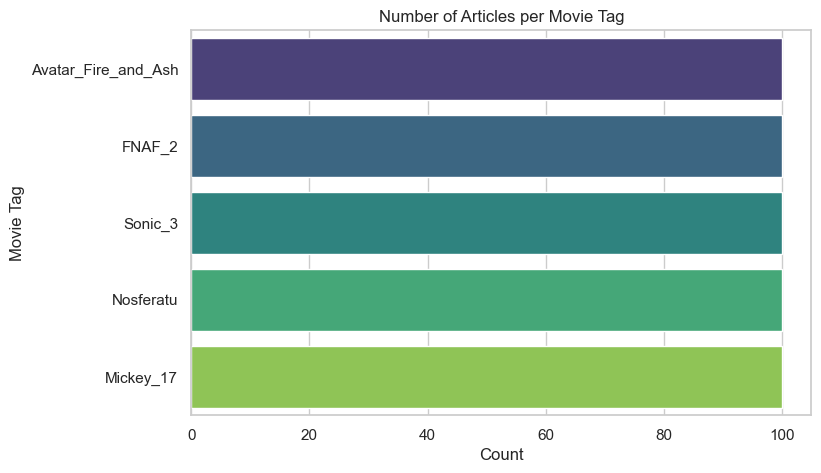

In [48]:
# Number of Airticles per Movie tag

plt.figure(figsize=(8,5))
sns.countplot(data=df, y="Movie_Tag", order=df["Movie_Tag"].value_counts().index, palette="viridis")
plt.title("Number of Articles per Movie Tag")
plt.xlabel("Count")
plt.ylabel("Movie Tag")
plt.show()


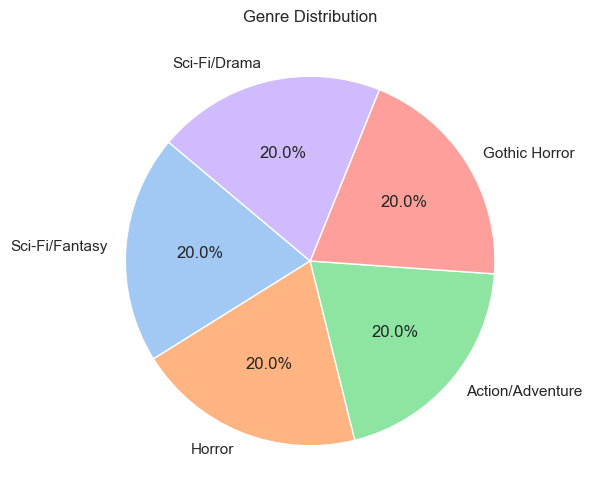

In [49]:
# pie chart Genre Distribution

genre_counts = df["Genre"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(genre_counts, labels=genre_counts.index, autopct="%1.1f%%", startangle=140, colors=sns.color_palette("pastel"))
plt.title("Genre Distribution")
plt.show()


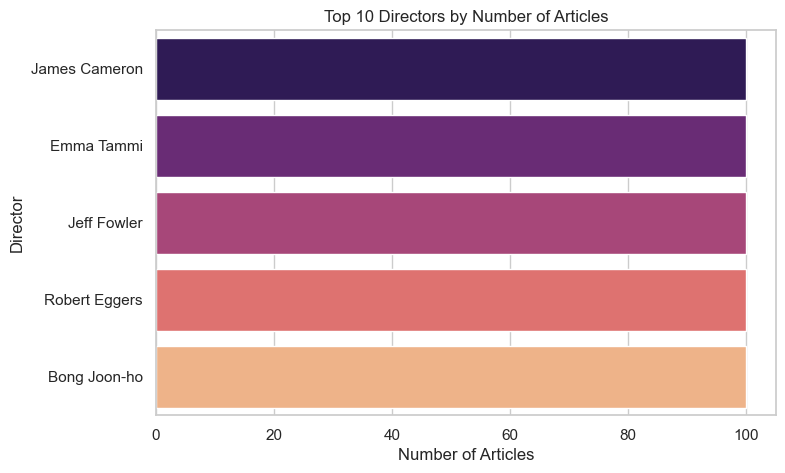

In [52]:
 # top 10 Directors by Airticle count

top_directors = df["Director"].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_directors.values, y=top_directors.index, palette="magma")
plt.title("Top 10 Directors by Number of Articles")
plt.xlabel("Number of Articles")
plt.ylabel("Director")
plt.show()


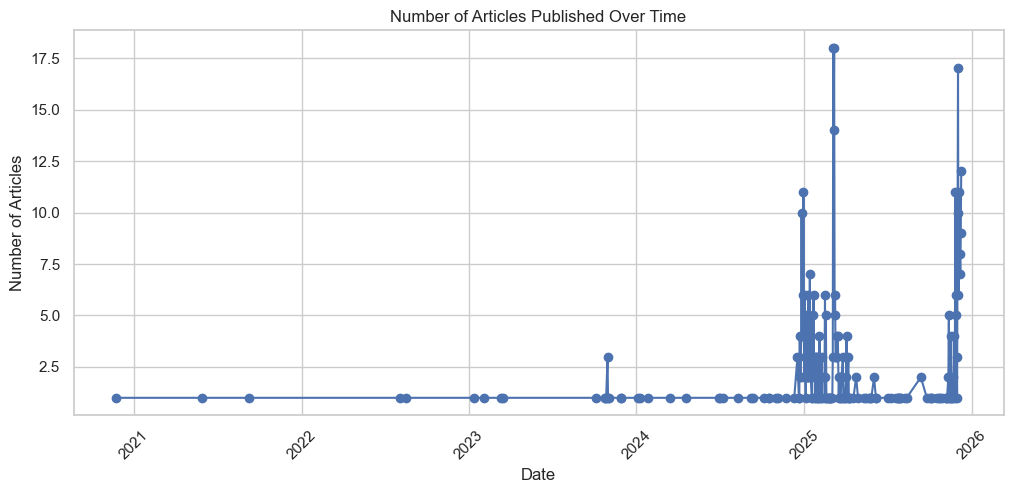

In [53]:
# articles published over Time

articles_over_time = df.groupby(df["Publish_Date"].dt.date).size()

plt.figure(figsize=(12,5))
articles_over_time.plot(marker="o")
plt.title("Number of Articles Published Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


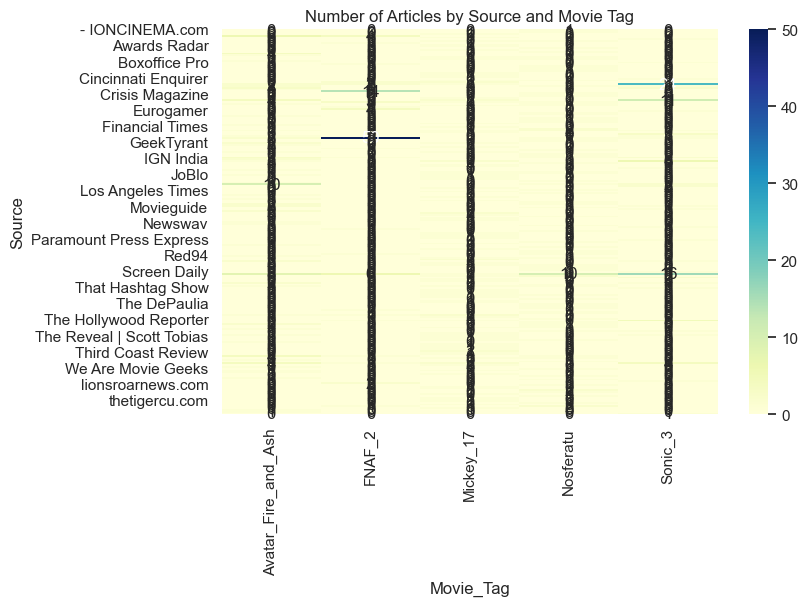

In [54]:
# heatmap of Source Vs Movie Tag

pivot_table = pd.crosstab(df["Source"], df["Movie_Tag"])
plt.figure(figsize=(8,5))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Number of Articles by Source and Movie Tag")
plt.show()


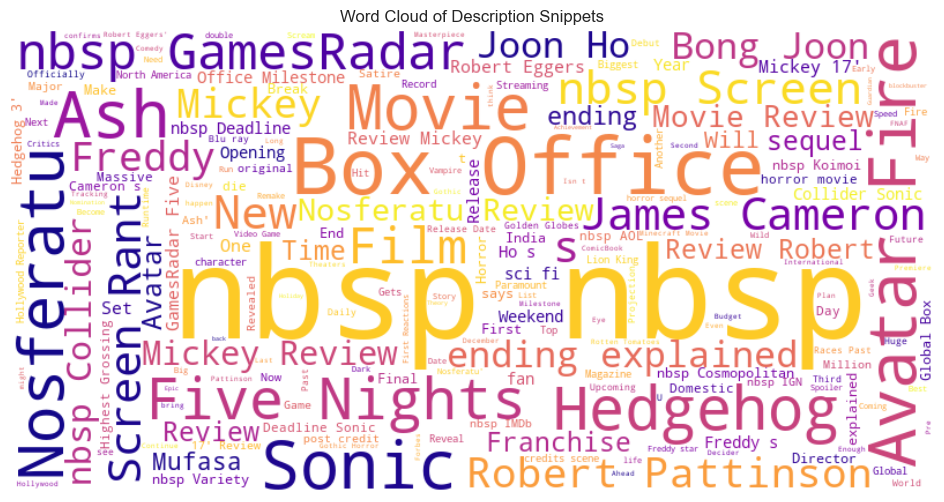

In [58]:
# Word Cloud for Description Snippets

snippet_text = " ".join(df["Description_Snippet"].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="plasma").generate(snippet_text)

plt.figure(figsize=(15,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Description Snippets")
plt.show()


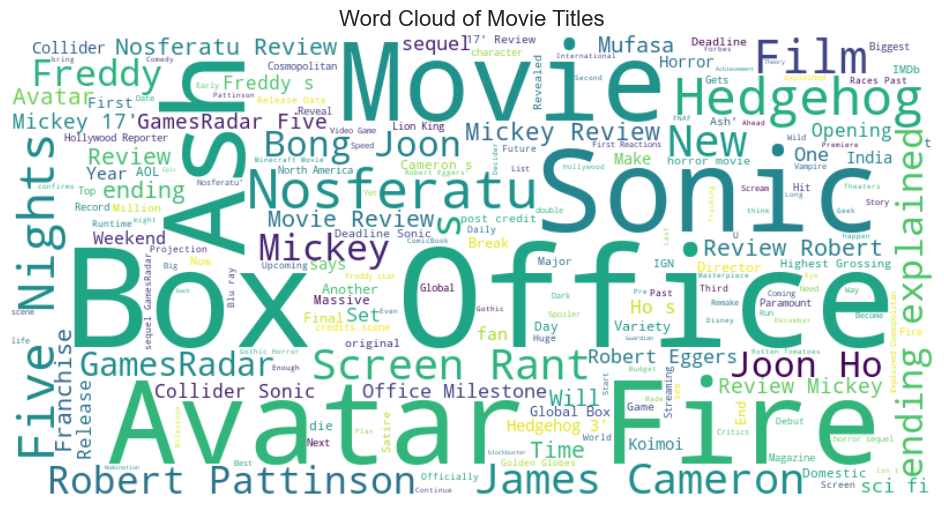

In [59]:
# Word Cloud for Titles


# Combine all titles
title_text = " ".join(df["Title"].astype(str))

# Generate word cloud
title_wc = WordCloud(width=800, height=400, background_color="white", colormap="viridis").generate(title_text)

# Plot
plt.figure(figsize=(15,6))
plt.imshow(title_wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Movie Titles", fontsize=16)
plt.show()


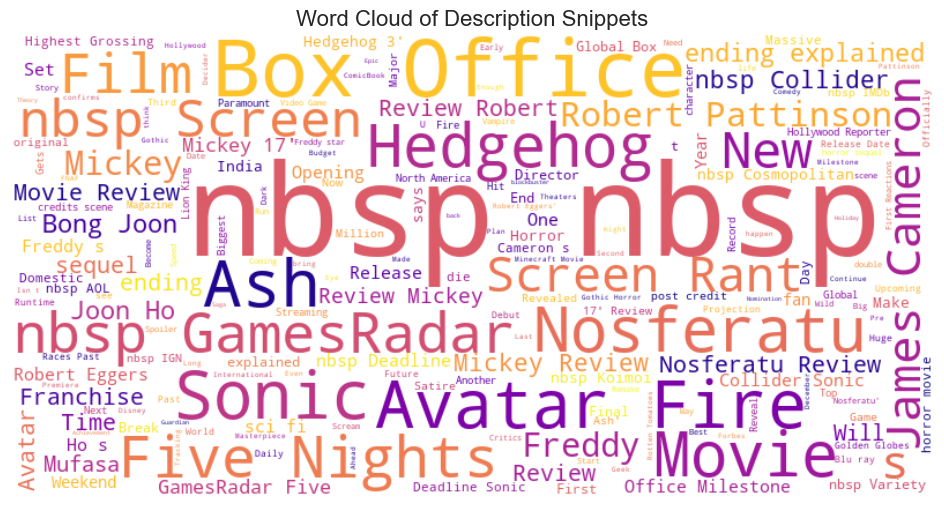

In [60]:
# Combine all description snippets
snippet_text = " ".join(df["Description_Snippet"].astype(str))

# Generate word cloud
snippet_wc = WordCloud(width=800, height=400, background_color="white", colormap="plasma").generate(snippet_text)

# Plot
plt.figure(figsize=(15,6))
plt.imshow(snippet_wc, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Description Snippets", fontsize=16)
plt.show()
